In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

# Dataset

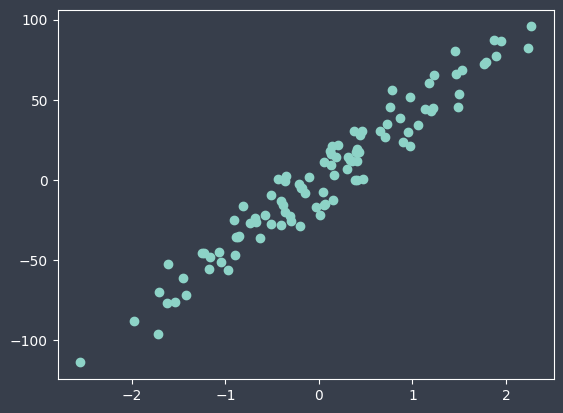

In [4]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [23]:
# redimensionner y
y = y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [25]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


# Initialisation

### $$\theta = \begin{bmatrix} a\\b \end{bmatrix}$$

In [26]:
np.random.seed(0)
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# Modèle

### $$F=X.\theta$$

In [27]:
def model(X, theta):
    return X.dot(theta)

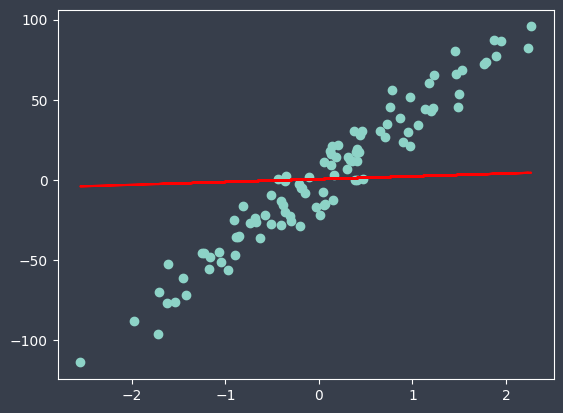

In [9]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# Fonction Coût

### $$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [11]:
cost_function(X, y, theta)

905.6306841935502

# Gradients

### $$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$$

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Descente de Gradients

### $$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$$

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# Phase d'entraînement

In [14]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [15]:
theta_final

array([[42.61765864],
       [-0.81309274]])

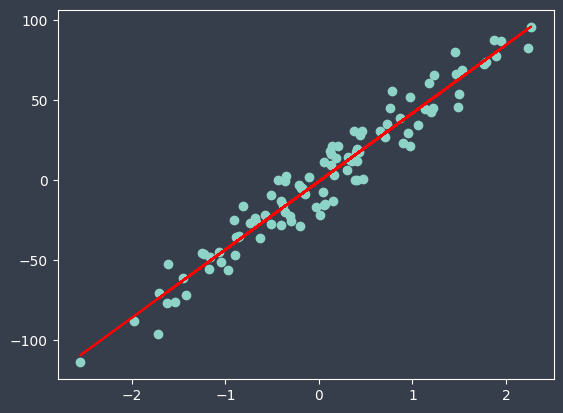

In [19]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='red')

# Courbes d'apprentissage

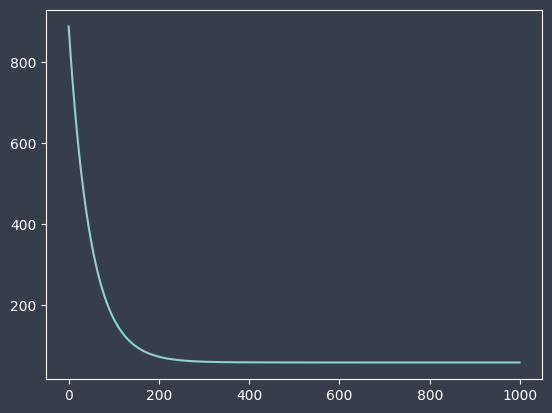

In [20]:
plt.plot(range(n_iterations), cost_history)

# Evaluation du modèle

### $${\displaystyle R^{2}=1-{\dfrac {\sum _{i=1}^{n}\left(y_{i}-{y_{i, \text{pred} }}\right)^{2}}{\sum _{i=1}^{n}\left(y_{i}-{\bar {y}}\right)^{2}}}}$$

In [21]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [22]:
coef_determination(y, predictions)

0.9417294706504984